# Conversion Rate Challenge


## Objectif

Optimiser des taux de conversion est une des tâches les plus importantes d'un data scientist.

C'est pourquoi, nous allons construire un modèle qui va prédire le taux de conversion de clients sur un site web et faire des recommendations à notre équipe marketing pour pouvoir augmenter notre revenu.


## Description du challenge

Nous avons récolté des données à propos d'utilisateurs du site d'une entreprise _anonyme_. Votre projet est de :

1. Créer un modèle de prédiction du taux de conversion (l'utilisateur va-t-il convertir ou non).

2. Trouver des recommendations à faire pour l'équipe Produit & Marketing afin qu'ils puissent améliorer ce taux de conversion.

## Données

Vous pourrez trouver les données dans votre dossier Projet -- CONVERSION RATE


## I - Data exploration

### A - Import of the data

In [167]:
# Import of librairies
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder

In [108]:
# Import of data
data = pd.read_csv('C:/Users/alexi/Downloads/conversion_data_train.csv')

In [109]:
data.shape

(284580, 6)

### B - Data structure of the dataframe

In [47]:
# First exploration
print("variable description:")
print(df.info())
print()
print("head:")
print(df.head())
print()
print('description:')
print(df.describe(include='all'))

variable description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB
None

head:
  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0

description:
       country            age       new_user  source  total_pages_visited  \
count   316200  316200.000000  316200.000000  316200      

Analysis of the dataframe structure:
- There are no missing value
- The dataset is composed of:
    - Qualitative values: 'country', 'source'
    - Qualitative values: 'age', 'new_user', 'total_pages_visited', 'converted'
- For qualitative values, there are 3 different countries and 4 different sources
- For quantitative values: 
    - 'age': the mean and the avegerage are at 30 years old, the population is young
    - 'new_user': 69% of users are new
    - 'total_pages_visited': average is 4.9, while median is 4. Some people visit lots of pages before converting!
    - 'converted': mean is 3.2%, this is global conversion rate

In [75]:
# Let's explore the unique values of the dataframe
for i in df.columns:
    print('Unique values of {}:'.format(i))
    print(df[i].unique())
    print()

Unique values of country:
['UK' 'US' 'China' 'Germany']

Unique values of age:
[ 25  23  28  39  30  31  27  29  38  43  24  36  37  33  20  35  17  50
  22  18  34  19  42  32  21  48  40  41  26  45  44  49  46  56  52  54
  51  47  53  60  57  55  59  61  58  62  65  63  66  67  64  68  69 123
  70  73  77  72  79 111]

Unique values of new_user:
[1 0]

Unique values of source:
['Ads' 'Seo' 'Direct']

Unique values of total_pages_visited:
[ 1  5  4  6  2  8  7  3  9 14 10 11 18 15 19 12 13 21 17 23 16 25 26 20
 22 24 27 28 29]

Unique values of converted:
[0 1]



Analysis of the unique values:
- 'country': there are 4 countires, UK, US, China and Germany
- 'age': the age is between 25 and 111 years old
- 'new_user': 1 or 0, we can infer 1 means the user is new
- 'source': there are 3 sources: 'Ads', 'Seo' and 'Direct'. They represent xxxxxxxxx
- 'total_pages_visited': it could be the number of webpage visited before the event of possible conversion
- 'converted': 1 or 0, we can infer 1 means the user has bought something

### C - Data visualization

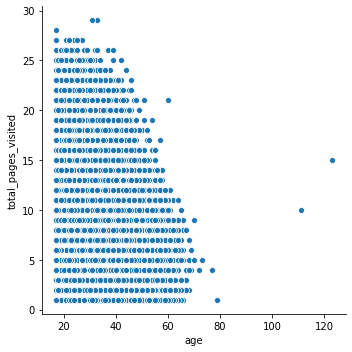

In [59]:
_ = sns.relplot(x='age',y='total_pages_visited',data=df)

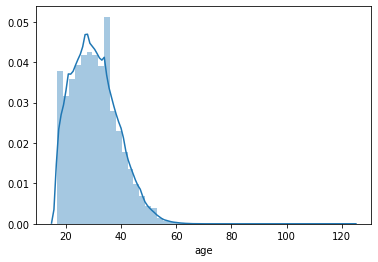

In [63]:
# Distribution of the age
_ = sns.distplot(df['age'])

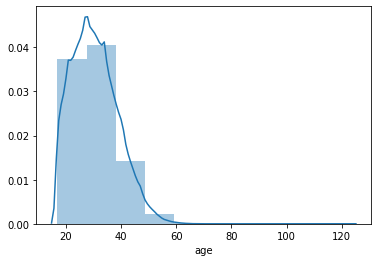

In [76]:
# Distribution of the age
_ = sns.distplot(df['age'], bins=10)

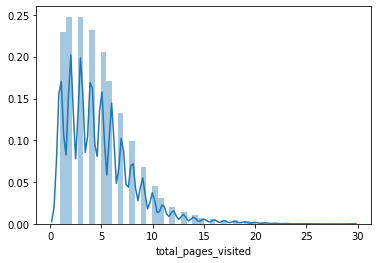

In [81]:
# Distribution of the pages visited
_ = sns.distplot(df['total_pages_visited'])

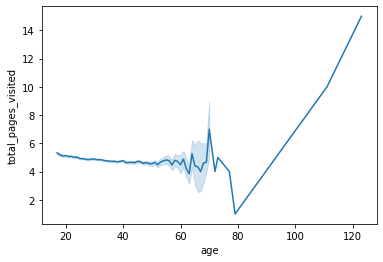

In [57]:
_ = sns.lineplot(x='age',y='total_pages_visited',data=df)

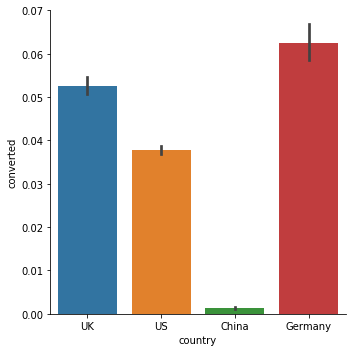

In [87]:
# Conversion by country
_ = sns.catplot(x='country',y='converted',kind="bar", data=df)
# It seems most of conversion is done in Germany, then Uk and US. China is really small in comparison

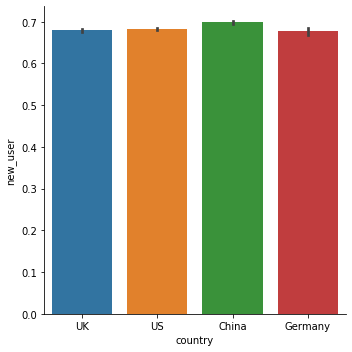

In [89]:
# Conversion by country
_ = sns.catplot(x='country',y='new_user',kind="bar", data=df)
# The proportion of new user is quite the same for every country

## II - Modelling

Ideas of analysis:
- Conversion by country
- Conversion by age
- Feature engineering on age

                          age  new_user  total_pages_visited  converted
age                  1.000000  0.012343            -0.045922  -0.088797
new_user             0.012343  1.000000            -0.082541  -0.152374
total_pages_visited -0.045922 -0.082541             1.000000   0.528994
converted           -0.088797 -0.152374             0.528994   1.000000


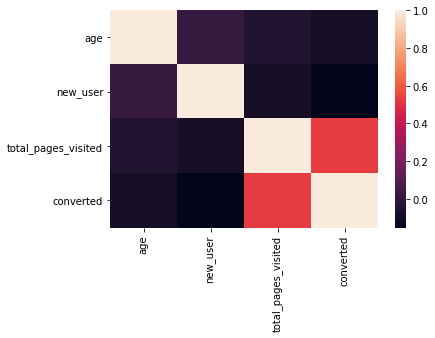

In [93]:
corr = df.corr()
print(corr)
_=sns.heatmap(corr)
# correlation of page visited and conversion

In [104]:
df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [124]:
features_list = ['country','age','new_user','source','total_pages_visited']
numeric_indices = [1,4]
categorical_indices = [0,2,3]
target_variable = 'converted'

In [125]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Variables explicatives : ', X.columns)
print()

Variables explicatives :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [127]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

In [136]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [137]:
X_train.head()

,country,age,new_user,source,total_pages_visited
17050,US,29,1,Seo,4
260342,US,23,0,Direct,7
278164,UK,33,1,Seo,11
268440,China,25,1,Seo,5
157837,US,40,0,Seo,1


In [138]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train)

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 29 1 'Seo' 4]
 ['US' 23 0 'Direct' 7]
 ['UK' 33 1 'Seo' 11]
 ...
 ['UK' 31 1 'Direct' 6]
 ['UK' 25 1 'Seo' 5]
 ['US' 34 1 'Ads' 3]]


In [141]:
numeric_features = [1,4]
numeric_transformer = StandardScaler()
categorical_features = [0,2,3]
categorical_transformer = OneHotEncoder()
feature_encoder = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
]
)
X_train = feature_encoder.fit_transform(X_train)


In [143]:
print(X_train.shape)

(227664, 11)


In [168]:
algo = DecisionTreeClassifier()
params = {'max_depth' : np.arange(5,10),
         'min_samples_leaf' : [1,2,3,4,5],
         'max_features ' : [1,2,3,4,5,6,7,8,9,10]}

classifier =  GridSearchCV(estimator=algo, param_grid= params, scoring='f1', cv = 10,verbose=5,n_jobs=-1)
classifier.fit(X_train, Y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.737, total=   0.8s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.705, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.717, total=   0.9s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.701, total=   0.7s
[CV] max_depth=1, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] ..... max_depth=1, min_samples_leaf=1, score=0.706, total=   0.7s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.713, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.689, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.709, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.719, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1 .................................
[CV] ..... max_depth=1, min_samples_leaf=1, score=0.706, total=   0.3s
[CV] max_depth=1, min_samples_leaf=5 .................................
[CV] ..... max_depth=1, min_samples_leaf=5, score=0.737, total=   0.3s
[CV] max_depth=1, min_samples_leaf=5 .................................
[CV] .

[CV] .... max_depth=2, min_samples_leaf=10, score=0.671, total=   0.2s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.634, total=   0.2s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.634, total=   0.2s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.646, total=   0.3s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.611, total=   0.3s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.655, total=   0.4s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .... max_depth=2, min_samples_leaf=10, score=0.647, total=   0.4s
[CV] max_depth=2, min_samples_leaf=10 ................................
[CV] .

[CV] ..... max_depth=4, min_samples_leaf=1, score=0.749, total=   1.2s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.741, total=   1.3s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.762, total=   1.1s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.727, total=   0.9s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.727, total=   1.1s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.727, total=   0.8s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.716, total=   0.6s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] .

[CV] ..... max_depth=5, min_samples_leaf=5, score=0.757, total=   0.6s
[CV] max_depth=5, min_samples_leaf=5 .................................
[CV] ..... max_depth=5, min_samples_leaf=5, score=0.735, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.748, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.749, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.763, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.728, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .... max_depth=5, min_samples_leaf=10, score=0.727, total=   0.6s
[CV] max_depth=5, min_samples_leaf=10 ................................
[CV] .

[CV] .... max_depth=6, min_samples_leaf=20, score=0.764, total=   1.1s
[CV] max_depth=6, min_samples_leaf=20 ................................
[CV] .... max_depth=6, min_samples_leaf=20, score=0.754, total=   1.1s
[CV] max_depth=6, min_samples_leaf=20 ................................
[CV] .... max_depth=6, min_samples_leaf=20, score=0.779, total=   1.4s
[CV] max_depth=6, min_samples_leaf=20 ................................
[CV] .... max_depth=6, min_samples_leaf=20, score=0.745, total=   1.3s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] ..... max_depth=7, min_samples_leaf=1, score=0.775, total=   1.5s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] ..... max_depth=7, min_samples_leaf=1, score=0.756, total=   1.1s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] ..... max_depth=7, min_samples_leaf=1, score=0.786, total=   1.3s
[CV] max_depth=7, min_samples_leaf=1 .................................
[CV] .

[CV] ..... max_depth=8, min_samples_leaf=5, score=0.745, total=   1.5s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.749, total=   2.0s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.748, total=   1.4s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.750, total=   1.1s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.782, total=   1.1s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] ..... max_depth=8, min_samples_leaf=5, score=0.746, total=   1.2s
[CV] max_depth=8, min_samples_leaf=10 ................................
[CV] .... max_depth=8, min_samples_leaf=10, score=0.756, total=   1.0s
[CV] max_depth=8, min_samples_leaf=10 ................................
[CV] .

[CV] .... max_depth=9, min_samples_leaf=20, score=0.783, total=   1.1s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.748, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.746, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.751, total=   1.1s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.751, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.748, total=   1.0s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .... max_depth=9, min_samples_leaf=20, score=0.775, total=   1.1s
[CV] max_depth=9, min_samples_leaf=20 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 5, 10, 20]},

In [172]:
classifier.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

In [179]:
classifier.best_estimator_.score(X_test, Y_test)

0.9855400941738702

In [180]:
classifier.best_estimator_.score(X_train, Y_train)

0.986348302761965

In [181]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [183]:
print('f1 score de train:', f1_score(Y_train_pred, Y_train))
print('f1 score de test:', f1_score(Y_test_pred, Y_test))

f1 score de train: 0.7675044883303412
f1 score de test: 0.7580596565230492


## TEST PIPELINE

In [149]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = feature_encoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-1.27912164  0.63598611  0.          0.          0.          1.
   0.          1.          1.          0.          0.        ]
 [ 0.05165043  0.03803388  0.          0.          0.          1.
   0.          1.          0.          0.          1.        ]
 [-0.3112874  -0.26094223  0.          0.          0.          1.
   1.          0.          0.          0.          1.        ]
 [-0.67422524 -0.26094223  0.          1.          0.          0.
   0.          1.          1.          0.          0.        ]
 [ 1.62438106  0.63598611  0.          0.          0.          1.
   1.          0.          1.          0.          0.        ]]


In [150]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [151]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7652606956915415
f1-score on test set :  0.7580596565230492


In [152]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[219482    852]
 [  2259   5071]]

Confusion matrix on test set : 
[[54855   211]
 [  592  1258]]



## Train best classifier on all data and use it to make predictions on X_without_labels

In [157]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

C:\Users\alexi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
# Read data without labels
data_without_labels = pd.read_csv('C:/Users/alexi/Downloads/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [159]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = feature_encoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.3112874   3.32677112  0.          0.          1.          0.
   1.          0.          0.          0.          1.        ]
 [-1.03716308  0.03803388  0.          0.          1.          0.
   0.          1.          0.          1.          0.        ]
 [ 0.17262971 -1.15787057  1.          0.          0.          0.
   0.          1.          0.          0.          1.        ]
 [ 0.17262971  0.33701     0.          0.          0.          1.
   0.          1.          1.          0.          0.        ]
 [-0.67422524 -0.55991834  1.          0.          0.          0.
   1.          0.          0.          0.          1.        ]]


In [160]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-baseline
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('C:/Users/alexi/Downloads/conversion_data_test_LesPingouinsv{}.csv'.format(iteration), index=False)
iteration +=1

In [171]:
iteration

1